<a href="https://colab.research.google.com/github/leoroman1/DL_project/blob/main/DL_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Drive connection

In [2]:
# connect to your drive with the dataset folder

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Utils

## Zip file extraction

In [3]:
import os
import zipfile
from tqdm import tqdm

def extract_zip(zip_path, destination_path = "/content"):

    os.makedirs(destination_path, exist_ok=True)

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        members = zip_ref.infolist()
        for member in tqdm(members, desc="Extracting", unit="file"):
            zip_ref.extract(member, path=destination_path)

    print(f"Extracted to: {destination_path}")


## Tar file extraction

In [4]:
import tarfile
from tqdm import tqdm
import os

def extract_tar(tar_path, destination_path = "/content"):

    os.makedirs(destination_path, exist_ok=True)

    with tarfile.open(tar_path, 'r:*') as tar:
        members = tar.getmembers()

        for member in tqdm(members, desc="Extracting", unit="file"):
            tar.extract(member, path=destination_path)

    print(f"Extracted to: {destination_path}")

## Zip and upload to drive

In [5]:
import shutil
import os

def save_zip_to_drive(folder_path, zip_name, destination_path = ''):

    zip_path = f"/content/{zip_name}.zip"

    shutil.make_archive(base_name=zip_path.replace('.zip', ''), format='zip', root_dir=folder_path)
    print(f"Zipped folder to: {zip_path}")

    destination_path = f"/content/drive/MyDrive/{destination_path}"
    os.makedirs(os.path.dirname(destination_path), exist_ok=True)
    shutil.move(zip_path, destination_path)
    print(f"Uploaded to Drive at: {destination_path}")


## Folder deletion from Colab

In [6]:
import shutil
import os

def delete_folders(folders_paths):

    for path in folders_paths:
        if os.path.exists(path):
            shutil.rmtree(path)
            print(f"Deleted: {path}")
        else:
            print(f"Not found: {path}")


## Folder renaming


In [7]:
import os

def rename_folder(folder_path, old_name, new_name):

    old_path_name = f"{folder_path}/{old_name}"
    new_path_name = f"{folder_path}/{new_name}"

    if os.path.exists(old_path_name):
        os.rename(old_path_name, new_path_name)
        print(f"{old_name} has been renamed to {new_name}")
    else:
        print(f"Folder not found: {old_path_name}")


## Copy files to another folder

In [8]:
import os
import shutil
from tqdm import tqdm

def copy_files_to_another_folder(source_folder, destination_folder, ids_list = 'all'):
    os.makedirs(destination_folder, exist_ok=True)

    if ids_list == 'all':
        files_to_copy = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]
    else:
        files_to_copy = [f"{id}.nii.gz" for id in ids_list]

    for filename in tqdm(files_to_copy, desc=f"Copying from {source_folder} to {destination_folder}", unit="file"):
        source_path = f"{source_folder}/{filename}"
        destination_path = f"{destination_folder}/{filename}"

        if not os.path.exists(source_path):
            print(f"Warning: {source_path} not found, skipping.")
            continue

        shutil.copy(source_path, destination_path)



## Apply a function to a folder

In [9]:
import os
import nibabel as nib
import numpy as np
import shutil
from tqdm import tqdm

def apply_function_to_folder(source_folder, destination_folder, function_to_apply):

    os.makedirs(destination_folder, exist_ok=True)

    for filename in tqdm(os.listdir(source_folder), desc=f"Applying function to files in {source_folder}", unit="file"):

        source_path = f"{source_folder}/{filename}"
        destination_path = f"{destination_folder}/{filename}"

        try:
            result_nii = function_to_apply(source_path)
            nib.save(result_nii, destination_path)
        except Exception as e:
            print(f"Error while processing file: {filename}: {e}")


## Verify Matching Files


In [ ]:
import os

def verify_matching_files(img_folder, lbl_folder):

    img_files = os.listdir(img_folder)
    lbl_files = os.listdir(lbl_folder)

    img_files=set(img_files)
    lbl_files=set(lbl_files)

    only_in_img = img_files - lbl_files
    only_in_lbl = lbl_files - img_files

    ok = True

    if only_in_img:
        ok = False
        print(f"Error: these names are only in '{img_folder}':")
        for n in sorted(only_in_img):
            print(f"{n }")

    if only_in_lbl:
        ok = False
        print(f"Error: these names are only in '{lbl_folder}':")
        for n in sorted(only_in_lbl):
            print(f"{n }")

    if ok:
        print(f"File names in '{img_folder}' and '{lbl_folder}' are the same")
    return ok


# Data Exploration (to do)

In [32]:
# Extract dataset tar
dataset_path = '/content/drive/MyDrive/Task01_BrainTumour.tar'
extract_tar(dataset_path)

# Main folders now
images_folder = '/content/Task01_BrainTumour/imagesTr'
labels_folder = '/content/Task01_BrainTumour/labelsTr'

Extracting: 100%|██████████| 1277/1277 [03:23<00:00,  6.26file/s] 

Extracted to: /content


In [34]:
# Analyse a sample

import nibabel as nib

patient_id = 'BRATS_001'

image_path = f"{images_folder}/{patient_id}.nii.gz"
label_path = f"{labels_folder}/{patient_id}.nii.gz"

image_nii = nib.load(image_path)
label_nii = nib.load(label_path)

image_data = image_nii.get_fdata()
label_data = label_nii.get_fdata()

print(f"Image shape: {image_data.shape}")
print(f"Label shape: {label_data.shape}")



Image shape: (240, 240, 155, 4)
Label shape: (240, 240, 155)


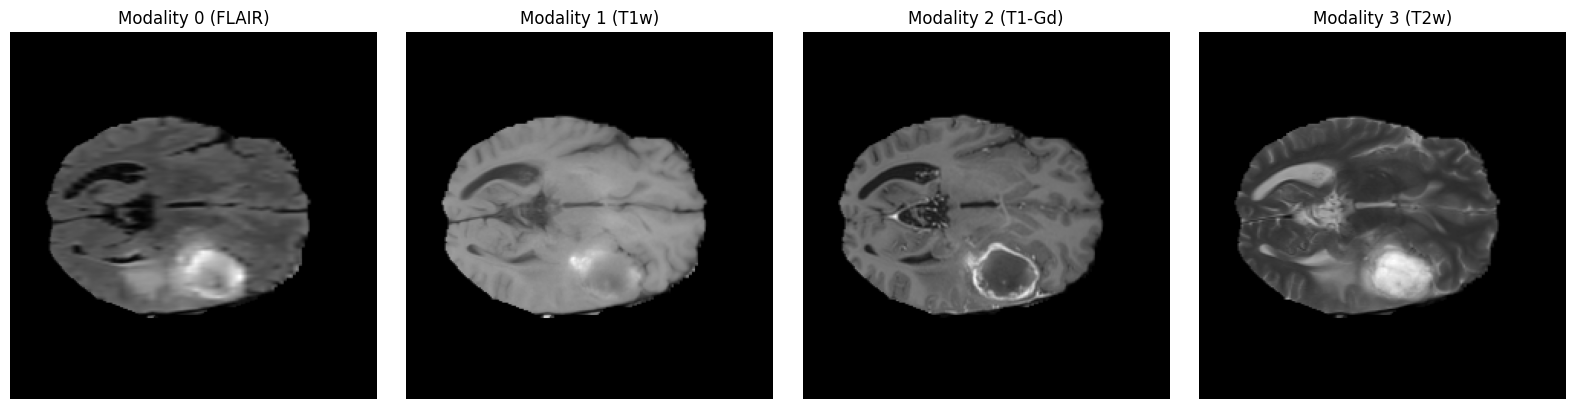

In [45]:
# Plot a slice of the volume in the 4 modalities

import matplotlib.pyplot as plt
import numpy as np

n_slice = 70

slices = image_data[:, :, n_slice, :]

plt.figure(figsize=(16, 4))

modality_names = ['FLAIR', 'T1w', 'T1-Gd', 'T2w']

for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(slices[:, :, i], cmap='gray')
    plt.title(f'Modality {i} ({modality_names[i]})')
    plt.axis('off')

plt.tight_layout()
plt.show()


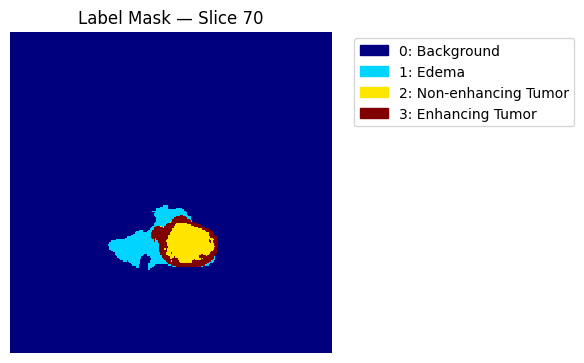

In [46]:
# Plot the respective label

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import numpy as np
from matplotlib.colors import ListedColormap

label_slice = label_data[:, :, n_slice]

class_labels = {
    0: 'Background',
    1: 'Edema',
    2: 'Non-enhancing Tumor',
    3: 'Enhancing Tumor'
}

# Get the 'jet' colormap and create a ListedColormap with 4 colors
jet = plt.colormaps.get_cmap('jet')
cmap = ListedColormap([jet(i/3.0) for i in range(4)])


plt.figure(figsize=(6, 6))
plt.imshow(label_slice, cmap=cmap, interpolation='nearest')
plt.title(f"Label Mask — Slice {n_slice}")
plt.axis('off')


legend_patches = [
    mpatches.Patch(color=cmap(i), label=f"{i}: {name}")
    for i, name in class_labels.items()
]

plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Processing label files:  29%|██▉       | 141/485 [00:34<01:30,  3.79file/s]

Error processing file ._BRATS_166.nii.gz: File /content/Task01_BrainTumour/labelsTr/._BRATS_166.nii.gz is not a gzip file


Processing label files: 100%|██████████| 485/485 [01:51<00:00,  4.34file/s]


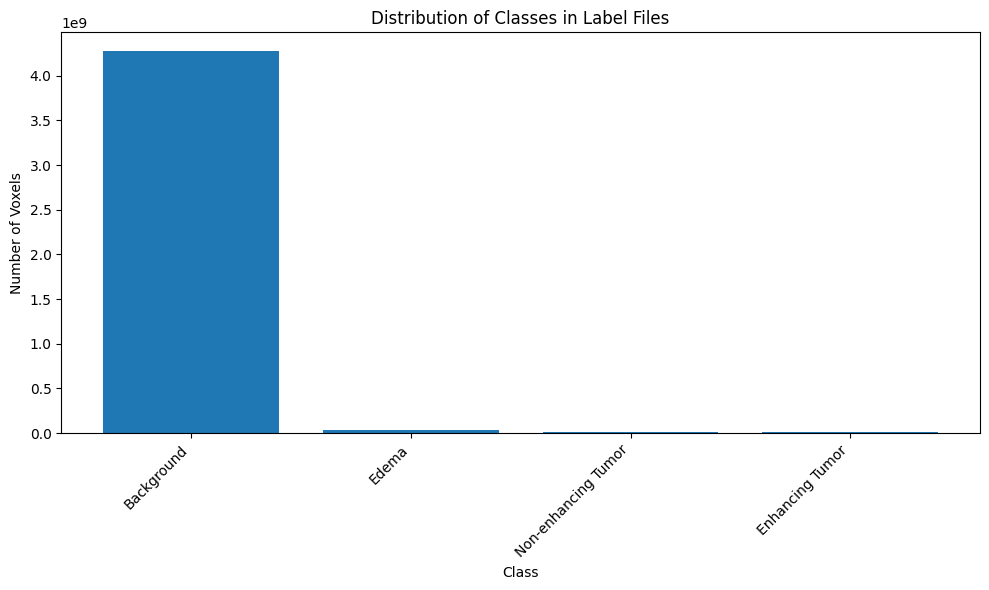

In [47]:
class_counts = {}

for filename in tqdm(os.listdir(labels_folder), desc="Processing label files", unit="file"):
    if filename.endswith('.nii.gz'):
        label_path = os.path.join(labels_folder, filename)
        try:
            label_nii = nib.load(label_path)
            label_data = label_nii.get_fdata().astype(int)

            unique_classes, counts = np.unique(label_data, return_counts=True)

            for cls, count in zip(unique_classes, counts):
                if cls not in class_counts:
                    class_counts[cls] = 0
                class_counts[cls] += count
        except Exception as e:
            print(f"Error processing file {filename}: {e}")

# Prepare data for plotting
classes = list(class_counts.keys())
counts = list(class_counts.values())

# Sort classes for consistent plotting
sorted_classes, sorted_counts = zip(*sorted(zip(classes, counts)))

# Map class IDs to labels
class_labels_map = {
    0: 'Background',
    1: 'Edema',
    2: 'Non-enhancing Tumor',
    3: 'Enhancing Tumor'
}
class_names = [class_labels_map.get(cls, f'Class {cls}') for cls in sorted_classes]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(class_names, sorted_counts)
plt.xlabel('Class')
plt.ylabel('Number of Voxels')
plt.title('Distribution of Classes in Label Files')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

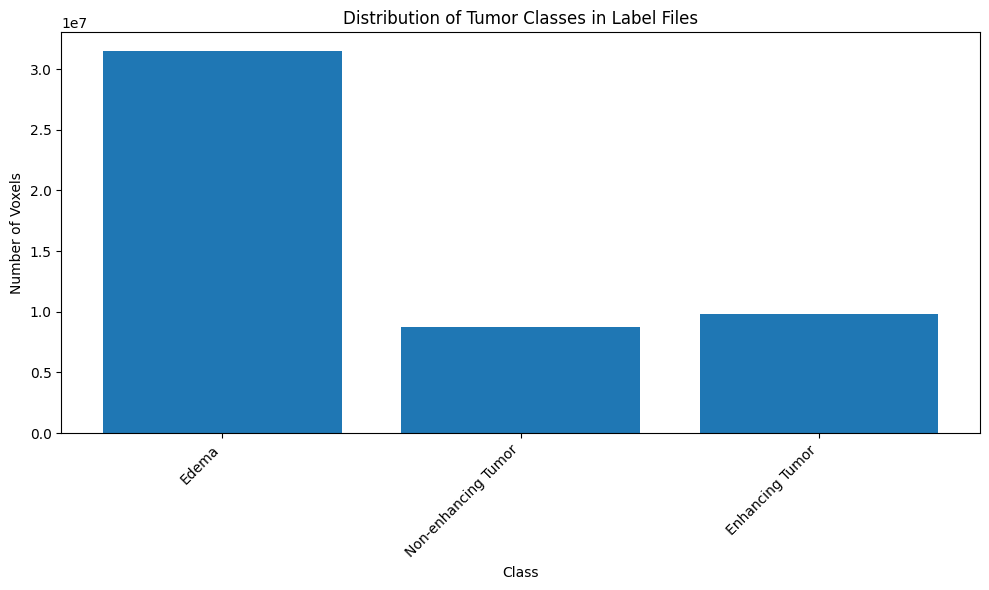

In [48]:
# prompt: looking at past cell, plot only the 3 classes not 0

# Prepare data for plotting, excluding class 0
classes_to_plot = [cls for cls in sorted_classes if cls != 0]
counts_to_plot = [count for cls, count in zip(sorted_classes, sorted_counts) if cls != 0]
names_to_plot = [class_labels_map.get(cls, f'Class {cls}') for cls in classes_to_plot]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(names_to_plot, counts_to_plot)
plt.xlabel('Class')
plt.ylabel('Number of Voxels')
plt.title('Distribution of Tumor Classes in Label Files')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Preprocessing functions



## Retrieve data IDs to use

In [10]:
import os
import json

def retrieve_ids_list(dataset_json_path):

    with open(dataset_json_path, 'r') as f:
        data = json.load(f)

    data_ids = []

    for entry in data['training']:
        image_path = entry['image']
        filename = os.path.basename(image_path)
        image_id = filename.replace('.nii.gz', '')
        data_ids.append(image_id)

    print("Number of IDs extracted:", len(data_ids))
    print("First 5 IDs of the list:", data_ids[:5])
    return data_ids





## Cropping samples


In [11]:
import os
import nibabel as nib
import numpy as np
from tqdm import tqdm

import nibabel as nib

import nibabel as nib

def crop_file(file_path, height_range=(40, 200), width_range=(40, 200), depth_range=(13, 141)):

    nii_file = nib.load(file_path)
    data = nii_file.get_fdata()

    h_start, h_end = height_range
    w_start, w_end = width_range
    d_start, d_end = depth_range

    if data.ndim == 4:
        cropped_data = data[h_start:h_end, w_start:w_end, d_start:d_end, :]
    elif data.ndim == 3:
        cropped_data = data[h_start:h_end, w_start:w_end, d_start:d_end]

    cropped_nii = nib.Nifti1Image(cropped_data, affine=nii_file.affine, header=nii_file.header)
    return cropped_nii

## Split samples with almost only background

In [12]:
import os
import nibabel as nib
import numpy as np
from tqdm import tqdm

def split_samples_by_presence_of_tumor_labels(labels_folder, threshold=0.01):

    above_threshold_ids = []
    below_threshold_ids = []

    for id in tqdm(os.listdir(labels_folder), desc="Splitting samples by tumor labels presence: ", unit="file"):

        label_path = f"{labels_folder}/{id}"
        label_nii = nib.load(label_path)
        label_data = label_nii.get_fdata().astype(np.uint8)

        total_labels = np.prod(label_data.shape)
        non_background_labels = np.sum(label_data > 0)
        ratio = non_background_labels / total_labels

        id = id.split('.')[0]
        if ratio >= threshold:
            above_threshold_ids.append(id)
        else:
            below_threshold_ids.append(id)

    print(f"{len(above_threshold_ids)} samples above the threshold")
    print(f"{len(below_threshold_ids)} samples below the threshold")

    return above_threshold_ids, below_threshold_ids




## Keep only 2 modalities

In [13]:
import os
import nibabel as nib
import numpy as np
import shutil
from tqdm import tqdm

def extract_modalities(image_path, channels=[0, 2]):

    if not os.path.exists(image_path):
        raise FileNotFoundError(f"{image_path} does not exist")

    image_nii = nib.load(image_path)
    image_data = image_nii.get_fdata()
    selected_channels_data = image_data[:, :, :, channels]

    return nib.Nifti1Image(selected_channels_data, affine=image_nii.affine, header=image_nii.header)



## Normalization

In [14]:
import nibabel as nib
import numpy as np

def normalize_image(image_path):

    image_nii = nib.load(image_path)
    image = image_nii.get_fdata()

    normalized_image = np.zeros_like(image)

    for m in range(image.shape[3]):
       modality = image[..., m]
       min_val = modality.min()
       max_val = modality.max()

       if max_val > min_val:
          normalized_image[..., m] = (modality - min_val) / (max_val - min_val)
       else:
          normalized_image[..., m] = 0.0

    return nib.Nifti1Image(normalized_image, affine=image_nii.affine, header=image_nii.header)



# Preprocessing execution

In [ ]:
# Extract dataset tar
dataset_path = '/content/drive/MyDrive/Task01_BrainTumour.tar'
extract_tar(dataset_path)

# Main folders now
images_folder = '/content/Task01_BrainTumour/imagesTr'
labels_folder = '/content/Task01_BrainTumour/labelsTr'

Extracting: 100%|██████████| 1277/1277 [01:10<00:00, 18.19file/s]

Extracted to: /content


In [ ]:
# Select IDs from the JSON
dataset_json_path = '/content/Task01_BrainTumour/dataset.json'
data_ids = retrieve_ids_list(dataset_json_path)

# Copy selected images to another folder
images_destination_folder = '/content/selected_imagesTr'
copy_files_to_another_folder(images_folder, images_destination_folder, data_ids)

# Copy selected labels to another folder
labels_destination_folder = '/content/selected_labelsTr'
copy_files_to_another_folder(labels_folder, labels_destination_folder, data_ids)

# Delete dataset folder to free space
colab_dataset_path = '/content/Task01_BrainTumour'
delete_folders([colab_dataset_path])

# Main folders now
images_folder = images_destination_folder
labels_folder = labels_destination_folder


Number of IDs extracted: 484
First 5 IDs of the list: ['BRATS_457', 'BRATS_306', 'BRATS_206', 'BRATS_449', 'BRATS_318']


Copying from /content/Task01_BrainTumour/imagesTr to /content/selected_imagesTr: 100%|██████████| 484/484 [00:32<00:00, 14.97file/s]
Copying from /content/Task01_BrainTumour/labelsTr to /content/selected_labelsTr: 100%|██████████| 484/484 [00:00<00:00, 3514.37file/s]


Deleted: /content/Task01_BrainTumour


In [ ]:
# Crop images
images_destination_folder = '/content/cropped_imagesTr'
apply_function_to_folder(images_folder, images_destination_folder, crop_file)

# Crop labels
labels_destination_folder = '/content/cropped_labelsTr'
apply_function_to_folder(labels_folder, labels_destination_folder, crop_file)

# Delete folders to free space
delete_folders([images_folder, labels_folder])

# Main folders now
images_folder = images_destination_folder
labels_folder = labels_destination_folder


Applying function to files in /content/selected_imagesTr: 100%|██████████| 484/484 [11:49<00:00,  1.47s/file]
Applying function to files in /content/selected_labelsTr: 100%|██████████| 484/484 [00:49<00:00,  9.78file/s]


Deleted: /content/selected_imagesTr
Deleted: /content/selected_labelsTr


In [ ]:
# Split samples with almost no tumor labels from others (could be used later)
above_threshold_ids, below_threshold_ids = split_samples_by_presence_of_tumor_labels(labels_folder)

# Put relevant images in another folder
rel_images_destination_folder = '/content/relevant_samples_imagesTr'
copy_files_to_another_folder(images_folder, rel_images_destination_folder, above_threshold_ids)

# Put relevant labels in another folder
rel_labels_destination_folder = '/content/relevant_samples_labelsTr'
copy_files_to_another_folder(labels_folder, rel_labels_destination_folder, above_threshold_ids)

# Put non relevant images in another folder
non_rel_images_destination_folder = '/content/non_relevant_samples/imagesTr'
copy_files_to_another_folder(images_folder, non_rel_images_destination_folder, below_threshold_ids)

# Put non relevant labels in another folder
non_rel_labels_destination_folder = '/content/non_relevant_samples/labelsTr'
copy_files_to_another_folder(labels_folder, non_rel_labels_destination_folder, below_threshold_ids)

# Upload non relevant samples zip to drive
non_rel_samples_path = '/content/non_relevant_samples'
save_zip_to_drive(non_rel_samples_path, 'non_relevant_samples')


# Delete past folders to free space
delete_folders([images_folder, labels_folder, non_rel_samples_path])

# Main folders now
images_folder = rel_images_destination_folder
labels_folder = rel_labels_destination_folder

Splitting samples by tumor labels presence: 100%|██████████| 484/484 [00:07<00:00, 64.38file/s]


420 samples above the threshold
64 samples below the threshold


Copying from /content/cropped_imagesTr to /content/relevant_samples_imagesTr: 100%|██████████| 420/420 [00:39<00:00, 10.69file/s]
Copying from /content/cropped_labelsTr to /content/relevant_samples_labelsTr: 100%|██████████| 420/420 [00:00<00:00, 6707.46file/s]
Copying from /content/cropped_imagesTr to /content/non_relevant_samples/imagesTr: 100%|██████████| 64/64 [00:06<00:00,  9.45file/s]
Copying from /content/cropped_labelsTr to /content/non_relevant_samples/labelsTr: 100%|██████████| 64/64 [00:00<00:00, 9102.28file/s]


Zipped folder to: /content/non_relevant_samples.zip
Uploaded to Drive at: /content/drive/MyDrive/
Deleted: /content/cropped_imagesTr
Deleted: /content/cropped_labelsTr
Deleted: /content/non_relevant_samples
Total files (including subfolders): 420


In [ ]:
# Keep just FLAIR and t1gt modalities
images_destination_folder = '/content/2channel_imagesTr'
apply_function_to_folder(images_folder, images_destination_folder, extract_modalities)

# Delete image folder to free space
delete_folders([images_folder])

# Main folders now
images_folder = images_destination_folder
labels_folder = labels_folder

Applying function to files in /content/relevant_samples_imagesTr: 100%|██████████| 420/420 [04:53<00:00,  1.43file/s]


Deleted: /content/relevant_samples_imagesTr


In [ ]:
# Normalize per sample
images_destination_folder = '/content/normalized_imagesTr'
apply_function_to_folder(images_folder, images_destination_folder, normalize_image)

# Delete image folder to free space
delete_folders([images_folder])

# Main folders now
images_folder = images_destination_folder
labels_folder = labels_folder

Applying function to files in /content/2channel_imagesTr: 100%|██████████| 420/420 [03:23<00:00,  2.07file/s]


Deleted: /content/2channel_imagesTr


In [ ]:
# Move images and labels to a single final folder
final_images_destination_folder = '/content/preprocessed_dataset/imagesTr'
final_labels_destination_folder = '/content/preprocessed_dataset/labelsTr'
copy_files_to_another_folder(images_folder, final_images_destination_folder)
copy_files_to_another_folder(labels_folder, final_labels_destination_folder)

# Upload zip of final dataset to Drive
final_dataset_path = '/content/preprocessed_dataset'
save_zip_to_drive(final_dataset_path, 'preprocessed_dataset')

# Delete folders to free space
delete_folders([images_folder, labels_folder, final_dataset_path])


Copying from /content/normalized_imagesTr to /content/preprocessed_dataset/imagesTr: 100%|██████████| 420/420 [00:55<00:00,  7.60file/s]
Copying from /content/relevant_samples_labelsTr to /content/preprocessed_dataset/labelsTr: 100%|██████████| 420/420 [00:00<00:00, 3576.85file/s]


Zipped folder to: /content/preprocessed_dataset.zip
Uploaded to Drive at: /content/drive/MyDrive/
Deleted: /content/normalized_imagesTr
Deleted: /content/relevant_samples_labelsTr
Deleted: /content/preprocessed_dataset


# Extract preprocessed dataset


In [14]:
# Unzip preprocessed dataset from Drive to Colab
preprocessed_dataset_path = '/content/drive/MyDrive/preprocessed_dataset.zip'
extract_zip(preprocessed_dataset_path)

# Main folder
images_folder = '/content/imagesTr'
labels_folder = '/content/labelsTr'

Extracting: 100%|██████████| 842/842 [00:52<00:00, 15.98file/s] 

Extracted to: /content


# Model setup functions


## Split IDs into Train, Validaton and Test

### Random

In [15]:
import os
from sklearn.model_selection import train_test_split

def split_ids_into_train_val_test(images_folder, train_ratio=0.8, validation_ratio=0.1, test_ratio=0.1, seed=1748):

    ids = [f.replace('.nii.gz', '') for f in os.listdir(images_folder)]
    ids.sort()

    train_ids, val_test_ids = train_test_split(ids, test_size=(1 - train_ratio), random_state=seed)

    validation_size = validation_ratio / (validation_ratio + test_ratio)
    validation_ids, test_ids = train_test_split(val_test_ids, test_size=(1 - validation_size), random_state=seed)

    print(f"Total IDs count: {len(ids)}")
    print(f"Train IDs count: {len(train_ids)}")
    print(f"Validation IDs count: {len(validation_ids)}")
    print(f"Test IDs count: {len(test_ids)}")

    return train_ids, validation_ids, test_ids


### Stratification

In [16]:
import os
import numpy as np
import nibabel as nib
import pandas as pd
from sklearn.model_selection import train_test_split

def stratified_split_ids(images_folder, labels_folder,
                         train_ratio=0.8, validation_ratio=0.1, test_ratio=0.1,
                         seed=1748):
    stats = []
    for fname in sorted(os.listdir(labels_folder)):
        if not fname.endswith('.nii.gz'):
            continue

        pid = fname.replace('.nii.gz', '')
        label = nib.load(os.path.join(labels_folder, fname)).get_fdata()
        class_counts = np.bincount(label.astype(np.int32).flatten(), minlength=4)
        volume = np.sum(label > 0)

        stats.append({
            "filename": pid,
            "volume": volume,
            "class0": class_counts[0],
            "class1": class_counts[1],
            "class2": class_counts[2],
            "class3": class_counts[3]
        })

    df = pd.DataFrame(stats)
    df['volume_bin'] = pd.qcut(df['volume'], q=4, labels=False, duplicates='drop')

    # Create stratification label based on volume bin + class presence
    df['strat_label'] = df.apply(
        lambda row: f"{row['volume_bin']}_{int(row['class1'] > 0)}{int(row['class2'] > 0)}{int(row['class3'] > 0)}",
        axis=1
    )

    # Handle rare strat groups (less than 2 samples)
    strat_counts = df['strat_label'].value_counts()
    rare_groups = strat_counts[strat_counts < 2].index

    print("\nSamples in rare stratification groups (< 2 samples):")
    for group in rare_groups:
        samples = df[df['strat_label'] == group]['filename'].tolist()
        print(f"  {group}: {samples}")

    df['strat_label'] = df['strat_label'].apply(lambda x: 'rare' if x in rare_groups else x)
    strat_counts = df['strat_label'].value_counts()

    # Reassign single-member groups (including 'rare') to largest group
    single_groups = strat_counts[strat_counts < 2].index.tolist()
    if single_groups:
        largest_group = strat_counts[~strat_counts.index.isin(single_groups)].idxmax()
        for group in single_groups:
            sample_id = df[df['strat_label'] == group]['filename'].iloc[0]
            df.loc[df['filename'] == sample_id, 'strat_label'] = largest_group
            print(f"Reassigned {sample_id} from '{group}' to '{largest_group}'")

    # Final stratified split
    ids = df['filename'].values
    labels = df['strat_label'].values

    trainval_ids, test_ids, trainval_labels, _ = train_test_split(
        ids, labels, test_size=test_ratio, stratify=labels, random_state=seed)

    val_ratio_adj = validation_ratio / (train_ratio + validation_ratio)
    train_ids, validation_ids = train_test_split(
        trainval_ids, test_size=val_ratio_adj, stratify=trainval_labels, random_state=seed)

    print(f"\nTotal IDs:      {len(ids)}")
    print(f"Train IDs:      {len(train_ids)}")
    print(f"Validation IDs: {len(validation_ids)}")
    print(f"Test IDs:       {len(test_ids)}")

    return list(train_ids), list(validation_ids), list(test_ids)


## Extract input dimensions

In [17]:
import os
import nibabel as nib

def get_input_size(images_folder):

    first_image = sorted(os.listdir(images_folder))[0]
    image_path = os.path.join(images_folder, first_image)

    image_data = nib.load(image_path).get_fdata()

    height, width, depth, modalities = image_data.shape

    print(f"Height: {height}, Width: {width}, Depth: {depth}, Modalities: {modalities}")

    return height, width, depth, modalities


# Loss functions

## Sparse Categorical Class Entropy Loss

In [20]:
import tensorflow as tf
from tensorflow.keras.losses import Dice, SparseCategoricalCrossentropy

scce_loss = SparseCategoricalCrossentropy(from_logits=False)

## Dice Loss

In [21]:
import tensorflow as tf
from tensorflow.keras.losses import Dice

number_of_classes = 4

def dice_loss(y_true, y_pred):

    y_true = tf.cast(y_true, tf.int32)
    y_true_one_hot = tf.one_hot(y_true, depth=number_of_classes)

    return Dice(axis=(1, 2))(y_true_one_hot, y_pred)

## Combo Losses

### Sparse Categorical Cross Entropy Loss and Dice Loss

In [22]:
def combo_scce_dice_loss(y_true, y_pred, alpha=0.5):
    scce_loss_value = scce_loss(y_true, y_pred)
    dice_loss_value = dice_loss(y_true, y_pred)
    return alpha * scce_loss_value + (1 - alpha) * dice_loss_value


# Metrics

## Intersection over Union

In [23]:
from tensorflow.keras.metrics import MeanIoU

number_of_classes = 4

iou_metric = MeanIoU(
    num_classes=number_of_classes,
    sparse_y_true=True,
    sparse_y_pred=False,
    name="IoU"
)

# Callbacks


## Drive checkpoint saver

In [24]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath='/content/drive/MyDrive/checkpoints/dice/epoch_{epoch:02d}.keras',
    save_freq='epoch',
    save_weights_only=False,
    save_best_only=False,
    verbose=1
)

## Reduce LR on Plateau

In [25]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    mode='min',
    factor=0.5,
    patience=2,
    min_lr=1e-6,
    verbose=1
)


## CSV Logger

In [ ]:
from tensorflow.keras.callbacks import CSVLogger

csv_logger = CSVLogger('/content/drive/MyDrive/Colab Notebooks/Deep Learning Project/checkpoints/Cross Entropy & Dice loss v4/losses_metrics.csv', append=True)


# 2D Related Code

# 2D U-Net model

In [18]:
from tensorflow.keras import layers, models

def conv_block(x, filters):
    x = layers.Conv2D(filters, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(filters, (3, 3), activation='relu', padding='same')(x)
    return x

input_layer = layers.Input(shape=(160, 160, 2))

# Encoder (Downsampling path)
c1 = conv_block(input_layer, 16)
p1 = layers.MaxPooling2D((2, 2))(c1)

c2 = conv_block(p1, 32)
p2 = layers.MaxPooling2D((2, 2))(c2)

c3 = conv_block(p2, 64)
p3 = layers.MaxPooling2D((2, 2))(c3)

c4 = conv_block(p3, 128)
p4 = layers.MaxPooling2D((2, 2))(c4)

c5 = conv_block(p4, 256)

# Decoder (Upsampling path)
u6 = layers.UpSampling2D((2, 2))(c5)
u6 = layers.Concatenate()([u6, c4])
c6 = conv_block(u6, 128)

u7 = layers.UpSampling2D((2, 2))(c6)
u7 = layers.Concatenate()([u7, c3])
c7 = conv_block(u7, 64)

u8 = layers.UpSampling2D((2, 2))(c7)
u8 = layers.Concatenate()([u8, c2])
c8 = conv_block(u8, 32)

u9 = layers.UpSampling2D((2, 2))(c8)
u9 = layers.Concatenate()([u9, c1])
c9 = conv_block(u9, 16)

output_layer = layers.Conv2D(4, (1, 1), activation='softmax')(c9)

# Data generator for slices

In [19]:
import os, numpy as np, nibabel as nib
from tensorflow.keras.utils import Sequence
from scipy import ndimage

class BrainTumor2DSliceGenerator(Sequence):
    def __init__(self,
                 images_folder,
                 labels_folder,
                 ids,
                 batch_size=36,
                 slice_step=8,
                 shuffle=True,
                 augment=False):
        self.images_folder = images_folder
        self.labels_folder = labels_folder
        self.batch_size    = batch_size
        self.slice_step    = slice_step
        self.shuffle       = shuffle
        self.augment       = augment
        self.ids           = sorted(ids)

        self.index_list = self._create_index_list()
        if self.shuffle:
            np.random.shuffle(self.index_list)

    def _create_index_list(self):
        index_list = []
        for pid in self.ids:
            vol_path = os.path.join(self.images_folder, f"{pid}.nii.gz")
            depth = nib.load(vol_path).shape[2]
            index_list.extend([(pid, z) for z in range(0, depth, self.slice_step)])
        return index_list

    def __len__(self):
        return int(np.ceil(len(self.index_list) / self.batch_size))

    def __getitem__(self, idx):
        batch_specs = self.index_list[idx*self.batch_size:(idx+1)*self.batch_size]
        X_list, y_list = [], []

        for pid, z in batch_specs:
            img = nib.load(os.path.join(self.images_folder, f"{pid}.nii.gz")).get_fdata(dtype=np.float32)
            msk = nib.load(os.path.join(self.labels_folder,  f"{pid}.nii.gz")).get_fdata()

            img_slice = img[:, :, z, :]
            msk_slice = msk[:, :, z]

            if self.augment:
                # horizontal flip
                if np.random.rand() < 0.5:
                    img_slice = np.flip(img_slice, 1)
                    msk_slice = np.flip(msk_slice, 1)

                # vertical flip
                if np.random.rand() < 0.5:
                    img_slice = np.flip(img_slice, 0)
                    msk_slice = np.flip(msk_slice, 0)

                # small rotation
                if np.random.rand() < 0.3:
                    angle = np.random.uniform(-15, 15)
                    for c in range(img_slice.shape[-1]):
                        img_slice[..., c] = ndimage.rotate(
                            img_slice[..., c], angle,
                            reshape=False, order=1, mode='nearest')
                    msk_slice = ndimage.rotate(
                        msk_slice, angle,
                        reshape=False, order=0, mode='nearest')

                # light gaussian noise
                if np.random.rand() < 0.3:
                    img_slice += np.random.normal(0, 0.01, img_slice.shape).astype(np.float32)

            X_list.append(img_slice.astype(np.float32))
            y_list.append(msk_slice.astype(np.int32))

        X_batch = np.stack(X_list, axis=0)
        y_batch = np.stack(y_list, axis=0)

        return X_batch, y_batch

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.index_list)



# Model setup

## Training from scratch

### First ids Split

In [ ]:
# Split IDs with stratification into train, test and validation (default ratio is 80, 10, 10)
train_ids, validation_ids, test_ids = stratified_split_ids(images_folder, labels_folder)

Samples in rare stratification groups (less than 2 samples):
Group '0_010': ['BRATS_026']
Stratification group counts after initial merging:
strat_label
2_111    105
3_111    105
1_111    105
0_111    104
rare       1
Name: count, dtype: int64
Found single-member stratification groups after merging: ['rare']. Reassigning these samples.
Largest group is: 2_111. Reassigning single samples to this group.
Reassigned sample BRATS_026 from group 'rare' to group '2_111'.
Stratification group counts after reassignment:
strat_label
2_111    106
3_111    105
1_111    105
0_111    104
Name: count, dtype: int64
Total IDs count: 420
Train IDs count: 336
Validation IDs count: 42
Test IDs count: 42


In [ ]:
import numpy as np

# Save ids to a file
np.savez('/content/drive/MyDrive/stratified_split_ids.npz',
         train_ids=train_ids,
         validation_ids=validation_ids,
         test_ids=test_ids)

### Training pipeline

In [ ]:
import numpy as np

# Load the saved ids file
data = np.load('/content/drive/MyDrive/stratified_split_ids.npz', allow_pickle=True)

# Extract the lists
train_ids = data['train_ids'].tolist()
validation_ids = data['validation_ids'].tolist()
test_ids = data['test_ids'].tolist()

Train IDs length: 336
Validation IDs length: 42
Test IDs length: 42


In [ ]:
# Get input size (care, in our case the net is 4 layers deep, so every dimension except the modalities must be divisible by 16. The general rule is to be divisible by 2^n for a n layers U-Net).
# In our case Depth won't be used being our U-Net 2D
height, width, depth, modalities = get_input_size(images_folder)


Height: 160, Width: 160, Depth: 128, Modalities: 2


In [ ]:
# Initialize train and validation data

train_batch_size = 144
train_slice_step = 2

validation_batch_size = 144
validation_slice_step = 2

train_data_gen = BrainTumor2DSliceGenerator(
    images_folder,
    labels_folder,
    train_ids,
    train_batch_size,
    train_slice_step,
    shuffle=True,
    augment=True
)

validation_data_gen = BrainTumor2DSliceGenerator(
    images_folder,
    labels_folder,
    validation_ids,
    validation_batch_size,
    validation_slice_step,
    shuffle=True,
    augment=False
)


In [ ]:
# Initialize model
model = models.Model(inputs=input_layer, outputs=output_layer)

# Compile model
model.compile(
    optimizer='adam',
    loss=combo_scce_dice_loss,
    metrics=[iou_metric]
)

# Fit model
history = model.fit(
          train_data_gen,
          validation_data=validation_data_gen,
          epochs=1,
          callbacks=[reduce_lr])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 33s/step - IoU: 0.2378 - loss: 0.5386 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/150 ━━━━━━━━━━━━━━━━━━━━ 5403s 36s/step - IoU: 0.2380 - loss: 0.5380 - val_IoU: 0.3074 - val_loss: 0.3968 - learning_rate: 0.0010


In [ ]:
# Save data

import os
import pickle

drive_save_folder = '/content/drive/MyDrive/DL_final_2'
os.makedirs(drive_save_folder, exist_ok=True)

model_path = os.path.join(drive_save_folder, 'm1.keras')
model.save(model_path)
print(f"Model saved to: {model_path}")



history_df = pd.DataFrame(history.history)

csv_path = os.path.join(drive_save_folder, 'h1.csv')
history_df.to_csv(csv_path, index=False)
print(f"Training history saved to: {csv_path}")


Model saved to: /content/drive/MyDrive/DL_final_2/m1.keras
Training history saved to: /content/drive/MyDrive/DL_final_2/h1.csv


## Training from saved model

In [ ]:
import numpy as np

# Load the saved ids file
data = np.load('/content/drive/MyDrive/stratified_split_ids.npz', allow_pickle=True)

# Extract the lists
train_ids = data['train_ids'].tolist()
validation_ids = data['validation_ids'].tolist()
test_ids = data['test_ids'].tolist()


In [ ]:
# Initialize train and validation data

train_batch_size = 144
train_slice_step = 8

validation_batch_size = 144
validation_slice_step = 8

train_data_gen = BrainTumor2DSliceGenerator(
    images_folder,
    labels_folder,
    train_ids,
    train_batch_size,
    train_slice_step,
    shuffle=True,
    augment=True
)

validation_data_gen = BrainTumor2DSliceGenerator(
    images_folder,
    labels_folder,
    validation_ids,
    validation_batch_size,
    validation_slice_step,
    shuffle=True,
    augment=False
)

In [ ]:
from tensorflow.keras.models import load_model

# Load model
model_path = '/content/drive/MyDrive/DL_final/m2.keras'

model = load_model(model_path, custom_objects={
    'combo_scce_dice_loss': combo_scce_dice_loss,
    'iou_metric': iou_metric,})

# Fit model
history = model.fit(
          train_data_gen,
          validation_data=validation_data_gen,
          epochs=3,
          initial_epoch=2,
          callbacks=[reduce_lr])


Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 754s 20s/step - IoU: 0.5285 - loss: 0.3435 - val_IoU: 0.5974 - val_loss: 0.3257 - learning_rate: 0.0010


In [ ]:
# Save data

import os
import pickle


drive_save_folder = '/content/drive/MyDrive/DL_final'
os.makedirs(drive_save_folder, exist_ok=True)


model_path = os.path.join(drive_save_folder, 'm3.keras')
model.save(model_path)
print(f"Model saved to: {model_path}")



history_df = pd.DataFrame(history.history)

csv_path = os.path.join(drive_save_folder, 'h3.csv')
history_df.to_csv(csv_path, index=False)
print(f"Training history saved to: {csv_path}")


Model saved to: /content/drive/MyDrive/DL_final/m3.keras
Training history saved to: /content/drive/MyDrive/DL_final/h3.csv


## Training Loop


In [ ]:
import numpy as np

# Load the saved ids file
data = np.load('/content/drive/MyDrive/stratified_split_ids.npz', allow_pickle=True)

# Extract the lists
train_ids = data['train_ids'].tolist()
validation_ids = data['validation_ids'].tolist()
test_ids = data['test_ids'].tolist()

In [ ]:
# Initialize train and validation data

train_batch_size = 144
train_slice_step = 8

validation_batch_size = 144
validation_slice_step = 8

train_data_gen = BrainTumor2DSliceGenerator(
    images_folder,
    labels_folder,
    train_ids,
    train_batch_size,
    train_slice_step,
    shuffle=True,
    augment=True
)

validation_data_gen = BrainTumor2DSliceGenerator(
    images_folder,
    labels_folder,
    validation_ids,
    validation_batch_size,
    validation_slice_step,
    shuffle=True,
    augment=False
)

In [ ]:
import os
import pandas as pd
from tensorflow.keras.models import load_model

drive_save_folder = '/content/drive/MyDrive/DL_final'
model_base_name = 'm'
history_base_name = 'h'
total_epochs = 30
step_size = 1
initial_epoch = 16

os.makedirs(drive_save_folder, exist_ok=True)

model = load_model(
    os.path.join(drive_save_folder, 'm16.keras'),
    custom_objects={'combo_scce_dice_loss': combo_scce_dice_loss,
                    'iou_metric': iou_metric}
)

for epoch_start in range(initial_epoch, total_epochs, step_size):
    epoch_end = min(epoch_start + step_size, total_epochs)

    print(f"\n--- Training from epoch {epoch_start} to {epoch_end} ---\n")

    history = model.fit(
        train_data_gen,
        validation_data=validation_data_gen,
        epochs=epoch_end,
        initial_epoch=epoch_start,
        callbacks=[reduce_lr]
    )

    model_name = f'{model_base_name}{epoch_end}.keras'
    model_path = os.path.join(drive_save_folder, model_name)
    model.save(model_path)
    print(f"Model saved to: {model_path}")

    history_name = f'{history_base_name}{epoch_end}.csv'
    history_path = os.path.join(drive_save_folder, history_name)

    pd.DataFrame(history.history).to_csv(history_path, index=False)
    print(f"Training history saved to: {history_path}")



--- Training from epoch 16 to 17 ---

Epoch 17/17
38/38 ━━━━━━━━━━━━━━━━━━━━ 1460s 38s/step - IoU: 0.6500 - loss: 0.3111 - val_IoU: 0.6156 - val_loss: 0.3200 - learning_rate: 0.0010
Model saved to: /content/drive/MyDrive/DL_final/m17.keras
Training history saved to: /content/drive/MyDrive/DL_final/h17.csv

--- Training from epoch 17 to 18 ---

Epoch 18/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 1475s 38s/step - IoU: 0.6468 - loss: 0.3106 - val_IoU: 0.6290 - val_loss: 0.3166 - learning_rate: 0.0010
Model saved to: /content/drive/MyDrive/DL_final/m18.keras
Training history saved to: /content/drive/MyDrive/DL_final/h18.csv

--- Training from epoch 18 to 19 ---

Epoch 19/19
38/38 ━━━━━━━━━━━━━━━━━━━━ 1454s 38s/step - IoU: 0.6564 - loss: 0.3100 - val_IoU: 0.6338 - val_loss: 0.3142 - learning_rate: 0.0010
Model saved to: /content/drive/MyDrive/DL_final/m19.keras
Training history saved to: /content/drive/MyDrive/DL_final/h19.csv

--- Training from epoch 19 to 20 ---

Epoch 20/20
38/38 ━━━━━━━━━━━━━━━━━━━

## Test model

In [27]:
import numpy as np

# Load the saved ids file
data = np.load('/content/drive/MyDrive/stratified_split_ids.npz', allow_pickle=True)

# Extract the lists
train_ids = data['train_ids'].tolist()
validation_ids = data['validation_ids'].tolist()
test_ids = data['test_ids'].tolist()

In [28]:
# Initialize test data generator

test_batch_size = 144
test_slice_step = 1

test_data_gen = BrainTumor2DSliceGenerator(
    images_folder,
    labels_folder,
    test_ids,
    batch_size=test_batch_size,
    slice_step=test_slice_step,
    shuffle=False
)

In [ ]:
# Load the model

from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/DL_final/m1.keras'

model = load_model(model_path, custom_objects={
    'combo_scce_dice_loss': combo_scce_dice_loss,
    'iou_metric': iou_metric,})

# Test the model
test_results = model.evaluate(test_data_gen, verbose=1)

In [ ]:
# Save data

import pandas as pd

results_dict = {name: [val] for name, val in zip(model.metrics_names, test_results)}

df = pd.DataFrame(results_dict)

csv_path = os.path.join('/content/drive/MyDrive/DL_final/', 't1.csv')
df.to_csv(csv_path, index=False)

print(f"Test results saved to: {csv_path}")


## Test Loop


In [50]:
import numpy as np

# Load the saved ids file
data = np.load('/content/drive/MyDrive/stratified_split_ids.npz', allow_pickle=True)

# Extract the lists
train_ids = data['train_ids'].tolist()
validation_ids = data['validation_ids'].tolist()
test_ids = data['test_ids'].tolist()

In [51]:
# Initialize test data generator

test_batch_size = 144
test_slice_step = 1

test_data_gen = BrainTumor2DSliceGenerator(
    images_folder,
    labels_folder,
    test_ids,
    batch_size=test_batch_size,
    slice_step=test_slice_step,
    shuffle=False
)

In [29]:
import os
import pandas as pd
from tensorflow.keras.models import load_model

custom_objects = {
    'combo_scce_dice_loss': combo_scce_dice_loss,
    'iou_metric': iou_metric,
}

drive_folder = '/content/drive/MyDrive/DL_final'

for i in range(19, 31):
    model_filename = f"m{i}.keras"
    csv_filename = f"t{i}.csv"

    model_path = os.path.join(drive_folder, model_filename)
    csv_path = os.path.join(drive_folder, csv_filename)

    if not os.path.exists(model_path):
        print(f"Model not found: {model_path}")
        continue

    print(f"\nLoading model {model_filename}...")
    model = load_model(model_path, custom_objects=custom_objects)

    print("Evaluating...")
    test_results = model.evaluate(test_data_gen, verbose=1)

    # Save results
    results_dict = {name: [val] for name, val in zip(model.metrics_names, test_results)}
    df = pd.DataFrame(results_dict)
    df.to_csv(csv_path, index=False)

    print(f"Results saved to: {csv_path}")



Loading model m19.keras...
Evaluating...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 1094s 28s/step - IoU: 0.6560 - loss: 0.3072
Results saved to: /content/drive/MyDrive/DL_final/t19.csv

Loading model m20.keras...
Evaluating...
38/38 ━━━━━━━━━━━━━━━━━━━━ 1082s 28s/step - IoU: 0.6440 - loss: 0.3114
Results saved to: /content/drive/MyDrive/DL_final/t20.csv

Loading model m21.keras...
Evaluating...
38/38 ━━━━━━━━━━━━━━━━━━━━ 1083s 28s/step - IoU: 0.6568 - loss: 0.3075
Results saved to: /content/drive/MyDrive/DL_final/t21.csv

Loading model m22.keras...
Evaluating...
38/38 ━━━━━━━━━━━━━━━━━━━━ 1088s 28s/step - IoU: 0.6380 - loss: 0.3120
Results saved to: /content/drive/MyDrive/DL_final/t22.csv

Loading model m23.keras...
Evaluating...
38/38 ━━━━━━━━━━━━━━━━━━━━ 1083s 28s/step - IoU: 0.6588 - loss: 0.3060
Results saved to: /content/drive/MyDrive/DL_final/t23.csv

Loading model m24.keras...
Evaluating...
38/38 ━━━━━━━━━━━━━━━━━━━━ 1108s 29s/step - IoU: 0.6660 - loss: 0.3052
Results saved to: /content/drive/MyDrive/DL_final/t24.csv

Loading model m

# Prediction exemple

In [41]:
# Load model
from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/DL_final/m30.keras'
model = load_model(
    model_path,
    compile=False
)

In [48]:
print(test_ids)

['BRATS_291', 'BRATS_280', 'BRATS_457', 'BRATS_147', 'BRATS_437', 'BRATS_389', 'BRATS_416', 'BRATS_172', 'BRATS_104', 'BRATS_445', 'BRATS_345', 'BRATS_207', 'BRATS_014', 'BRATS_295', 'BRATS_367', 'BRATS_123', 'BRATS_304', 'BRATS_181', 'BRATS_097', 'BRATS_369', 'BRATS_163', 'BRATS_433', 'BRATS_187', 'BRATS_414', 'BRATS_252', 'BRATS_161', 'BRATS_464', 'BRATS_038', 'BRATS_253', 'BRATS_320', 'BRATS_211', 'BRATS_002', 'BRATS_113', 'BRATS_344', 'BRATS_408', 'BRATS_249', 'BRATS_255', 'BRATS_319', 'BRATS_052', 'BRATS_205', 'BRATS_415', 'BRATS_265']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


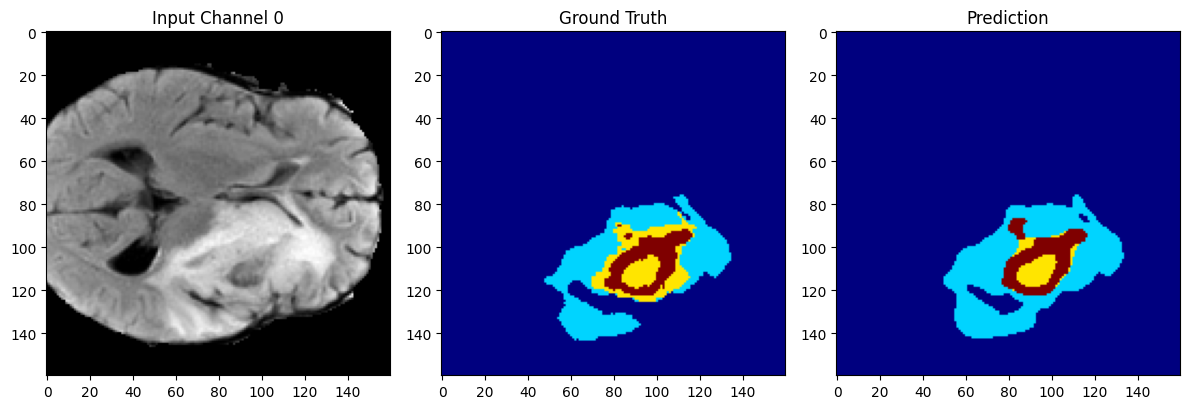

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib

# Load one image and label
img_path = '/content/imagesTr/BRATS_205.nii.gz'
label_path = '/content/labelsTr/BRATS_205.nii.gz'

img = nib.load(img_path).get_fdata()
label = nib.load(label_path).get_fdata()

slice_index = 60

# Preprocess input
input_slice = img[:, :, slice_index, :2]
input_slice = np.expand_dims(input_slice, axis=0)

# Predict
pred = model.predict(input_slice)
pred_label = np.argmax(pred[0], axis=-1)

# Plot result
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(input_slice[0, :, :, 0], cmap='gray')
plt.title('Input Channel 0')

plt.subplot(1, 3, 2)
plt.imshow(label[:, :, slice_index], cmap='jet')
plt.title('Ground Truth')

plt.subplot(1, 3, 3)
plt.imshow(pred_label, cmap='jet')
plt.title('Prediction')

plt.tight_layout()
plt.show()


# Evaluation


## IoU and Loss plots


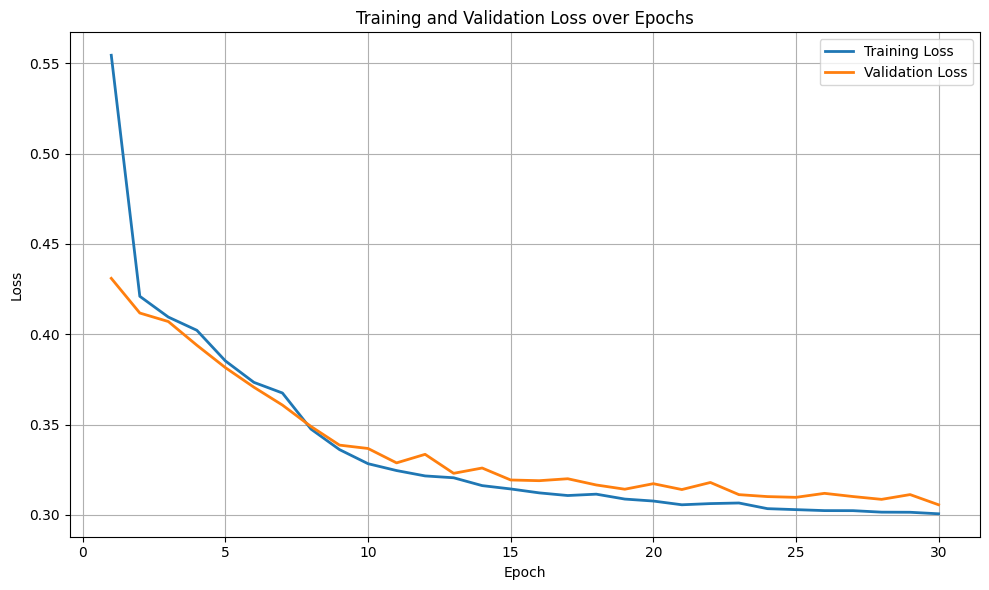

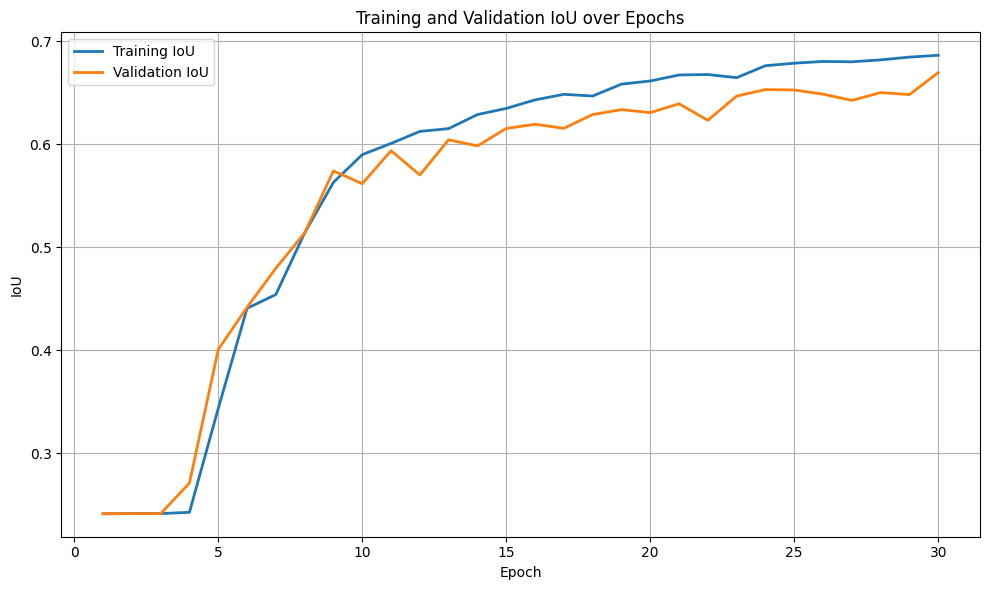

In [45]:
import os
import pandas as pd
import matplotlib.pyplot as plt



drive_folder = '/content/drive/MyDrive/DL_final'

history_rows = []

for i in range(1, 31):
    file_path = os.path.join(drive_folder, f'h{i}.csv')

    if not os.path.exists(file_path):
        print(f"Missing: h{i}.csv")
        continue

    row = pd.read_csv(file_path)
    row['epoch'] = i  # Add epoch info
    history_rows.append(row)

df = pd.concat(history_rows, ignore_index=True)

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['loss'], label='Training Loss', linewidth=2)
plt.plot(df['epoch'], df['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['IoU'], label='Training IoU', linewidth=2)
plt.plot(df['epoch'], df['val_IoU'], label='Validation IoU', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('IoU')
plt.title('Training and Validation IoU over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Loss plot saved to: /content/drive/MyDrive/DL_final/test_loss_plot.png


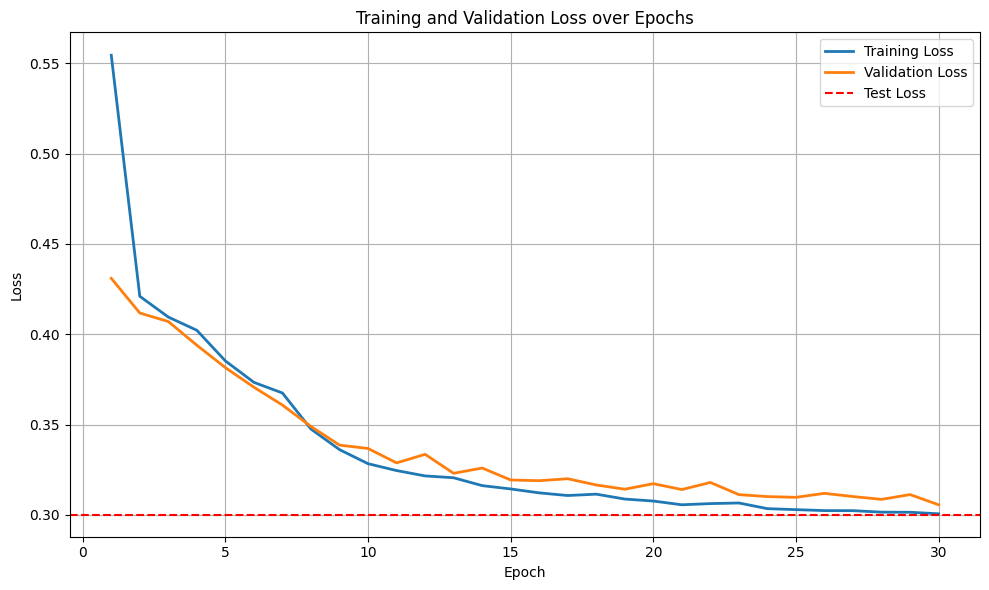

IoU plot saved to: /content/drive/MyDrive/DL_final/test_iou_plot.png


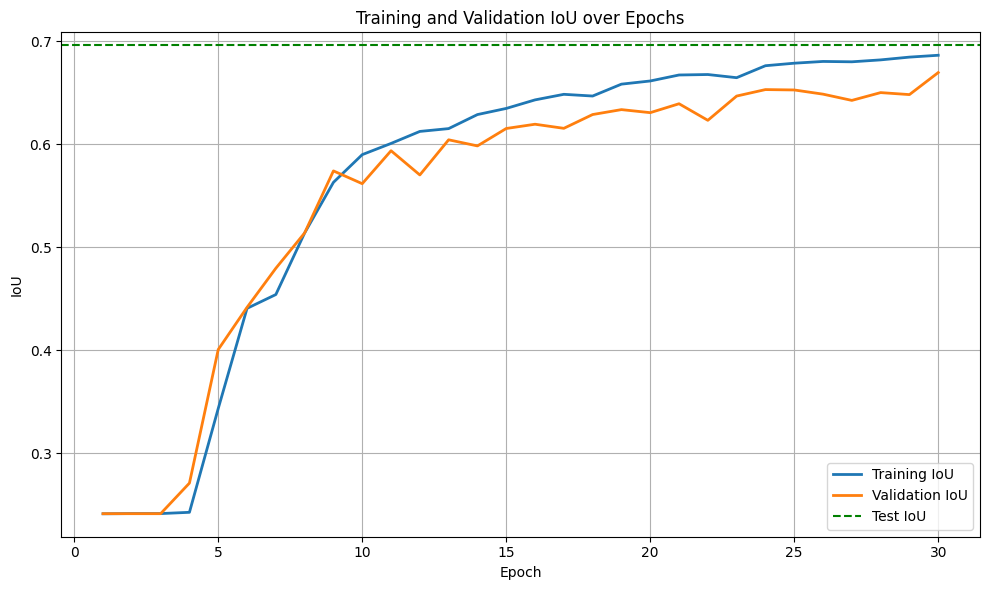

In [47]:
import os
import pandas as pd
import matplotlib.pyplot as plt



drive_folder = '/content/drive/MyDrive/DL_final'

history_rows = []
for i in range(1, 31):
    file_path = os.path.join(drive_folder, f'h{i}.csv')
    if os.path.exists(file_path):
        row = pd.read_csv(file_path)
        row['epoch'] = i
        history_rows.append(row)

df = pd.concat(history_rows, ignore_index=True)

test_file = os.path.join(drive_folder, 't30.csv')
test_df = pd.read_csv(test_file)
test_loss = test_df['loss'].values[0]
test_iou = test_df['compile_metrics'].values[0]

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['loss'], label='Training Loss', linewidth=2)
plt.plot(df['epoch'], df['val_loss'], label='Validation Loss', linewidth=2)
plt.axhline(y=test_loss, color='red', linestyle='--', label=f'Average Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['IoU'], label='Training IoU', linewidth=2)
plt.plot(df['epoch'], df['val_IoU'], label='Validation IoU', linewidth=2)
plt.axhline(y=test_iou, color='green', linestyle='--', label=f'Average Test IoU')
plt.xlabel('Epoch')
plt.ylabel('IoU')
plt.title('Training and Validation IoU over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Precision and Recall on Test data

In [ ]:
import numpy as np

# Load the saved ids file
data = np.load('/content/drive/MyDrive/stratified_split_ids.npz', allow_pickle=True)

# Extract the lists
train_ids = data['train_ids'].tolist()
validation_ids = data['validation_ids'].tolist()
test_ids = data['test_ids'].tolist()

In [ ]:
# Initialize test data generator

test_batch_size = 100
test_slice_step = 1

test_data_gen = BrainTumor2DSliceGenerator(
    images_folder,
    labels_folder,
    test_ids,
    batch_size=test_batch_size,
    slice_step=test_slice_step,
    shuffle=False
    )

In [ ]:
# Load the model

from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/DL_final/m30.keras'

model = load_model(model_path, custom_objects={
    'combo_scce_dice_loss': combo_scce_dice_loss,
    'iou_metric': iou_metric,})

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred_probs = model.predict(test_data_gen, verbose=1)

y_pred_classes = np.argmax(y_pred_probs, axis=-1)

y_true_list = []
for i in range(len(test_data_gen)):
    _, y_true_batch = test_data_gen[i]
    y_true_list.append(y_true_batch)
y_true = np.concatenate(y_true_list, axis=0)

y_pred_flat = y_pred_classes.flatten()
y_true_flat = y_true.flatten()

precision_per_class = precision_score(y_true_flat, y_pred_flat, average=None, zero_division=0)
recall_per_class = recall_score(y_true_flat, y_pred_flat, average=None, zero_division=0)
f1_per_class = f1_score(y_true_flat, y_pred_flat, average=None, zero_division=0)

for class_id in range(len(precision_per_class)):
    print(f"Class {class_id} — Precision: {precision_per_class[class_id]:.4f}, "
          f"Recall: {recall_per_class[class_id]:.4f}, "
          f"F1-score: {f1_per_class[class_id]:.4f}")

# 3D Related Code

# Split into Train, Validation and Test

In [ ]:
import os
import shutil
import random
import numpy as np

# new folders creation
image_train_dir = '/content/imageTrain'
label_train_dir = '/content/labelTrain'
image_validation_dir = '/content/imageValidation'
label_validation_dir = '/content/labelValidation'
image_test_dir = '/content/imageTest'
label_test_dir = '/content/labelTest'
for d in [image_train_dir, label_train_dir, image_validation_dir, label_validation_dir, image_test_dir, label_test_dir]:
    os.makedirs(d, exist_ok=True)

train_ids, validation_ids, test_ids = stratified_split_ids(images_dir, labels_dir)

# create list of (image_path, label_path)
train_files = [(os.path.join(images_dir, f"{id}.nii.gz"), os.path.join(labels_dir, f"{id}.nii.gz")) for id in train_ids]
validation_files = [(os.path.join(images_dir, f"{id}.nii.gz"), os.path.join(labels_dir, f"{id}.nii.gz")) for id in validation_ids]
test_files = [(os.path.join(images_dir, f"{id}.nii.gz"), os.path.join(labels_dir, f"{id}.nii.gz")) for id in test_ids]

# copy
copy_files(train_files, image_train_dir, label_train_dir)
copy_files(validation_files, image_validation_dir, label_validation_dir)
copy_files(test_files, image_test_dir, label_test_dir)

# delete
delete_folder(images_dir)
delete_folder(labels_dir)

# check matching files
verify_matching_files(image_train_dir, label_train_dir)
verify_matching_files(image_validation_dir, label_validation_dir)
verify_matching_files(image_test_dir, label_test_dir)

In [ ]:
# Check

import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

nii_file = nib.load("/content/imageTrain/BRATS_142.nii.gz")
img_norm = nii_file.get_fdata()
nii_file = nib.load("/content/labelTrain/BRATS_142.nii.gz")
lbl = nii_file.get_fdata()

print(img_norm.shape)
print(lbl.shape)
print(img_norm[80][80][60][2])
print(lbl[100][120][64])

def show_4_mri_with_labels(volume, label):
  # Create figure for modalities
  plt.figure(figsize=(12, 4))

  # Loop through the 4 modalities
  for i in range(4):
      # Create subplot
      plt.subplot(1, 4, i+1)
      # Display middle slice of current modality
      plt.imshow(volume[..., volume.shape[2]//2, i], cmap='gray')
      """
      ...: all rows, all columns
      volume.shape[2] is the number of slices (DEPTH)
      volume.shape[2] // 2 takes the middle slice index
      i is the modality index (from 0 to 3)
      It's like saying: “Give me the 2D image for the center of the brain, for modality i.”
      The result is a 2D image of shape (H, W).
      """
      # Set modality title
      plt.title(f'Modality {i+1}')

  # Show modality plots
  plt.show()

  # Display middle slice of label
  plt.imshow(label[..., label.shape[2]//2], cmap='nipy_spectral')
  # Set label title
  plt.title('Label')

  # Show label plot
  plt.show()

show_4_mri_with_labels(img_norm, lbl)

# Data generator for 3D volumes

## Data Augmentation

In [ ]:
import nibabel as nib
import numpy as np
import os
from scipy import ndimage

def random_augment_3d(image, label):
    """
    image: numpy array (H, W, D, C)
    label: numpy array (H, W, D, C)
    """
    # symmetric to x-axis
    if np.random.rand() > 0.5:
        image = np.flip(image, axis=0)
        label = np.flip(label, axis=0)

    # symmetric to y-axis
    if np.random.rand() > 0.5:
        image = np.flip(image, axis=1)
        label = np.flip(label, axis=1)

    # symmetric to z-axis
    if np.random.rand() > 0.5:
        image = np.flip(image, axis=2)
        label = np.flip(label, axis=2)

    # light gaussian noise ONLY on background
    if np.random.rand() > 0.5:
        # background mask from the one-hot encoded label
        background_mask = label[..., 0] == 1  # shape (H, W, D)

        # expand to match image channels
        background_mask = np.expand_dims(background_mask, axis=-1)  # shape (H, W, D, 1)
        background_mask = np.repeat(background_mask, image.shape[-1], axis=-1)  # shape (H, W, D, C)

        # apply gaussian noise only to background
        noise = np.random.normal(0, 0.01, size=image.shape)
        image = image + noise * background_mask

    return image, label

## One Hot Encoding Labels

In [ ]:
# labels must be one hot encoded

import tensorflow as tf

def one_hot_encode_label_tf(label, num_classes=4):
    label = tf.convert_to_tensor(label, dtype=tf.int32)
    one_hot = tf.one_hot(label, depth=num_classes)
    return one_hot.numpy()

## Batch Generator

In [ ]:
# function to load a group of .nii.gz files from a folder and return them as a NumPy vector

import os
import numpy as np
import nibabel as nib

def load_list(file_dir, file_list):
    # file_list is a list of filenames like ["BRATS_001.nii.gz", ...]

    vector = []

    for filename in file_list:
        path = os.path.join(file_dir, filename)
        current = nib.load(path).get_fdata()

        if current.ndim == 3: # if label
          current = one_hot_encode_label_tf(current)

        vector.append(current)

    return np.array(vector)

In [ ]:

# function to generate the Batch: a vector where each element is a tuple: (image, label)

def batchLoader(img_dir, img_list, label_dir, label_list, batch_size, augment=True):

    L = len(img_list)

    # Keras requires batches to be provided one at the time
    while True:

        indices = np.random.permutation(L)
        img_list = np.array(img_list)[indices]
        label_list = np.array(label_list)[indices]

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)

            X = load_list(img_dir, img_list[batch_start:limit])
            Y = load_list(label_dir, label_list[batch_start:limit])

            # data augmentation
            if augment:
                for i in range(len(X)):
                    X[i], Y[i] = random_augment_3d(X[i], Y[i])

            yield (X,Y)
            # similar to 'return' but it doesn't end the function, it just suspends it.
            # It builds a tuple with two numpy arrays with batch_size samples

            batch_start += batch_size
            batch_end += batch_size

# 3D U-Net

## Instance Normalization Function

In [ ]:


import tensorflow as tf
from tensorflow.keras.layers import Layer

class InstanceNormalization(Layer):
    def __init__(self, epsilon=1e-5, **kwargs):
        super().__init__(**kwargs)
        self.epsilon = epsilon

    def build(self, input_shape):
        self.gamma = self.add_weight(shape=(input_shape[-1],),
                                     initializer="ones",
                                     trainable=True)
        self.beta = self.add_weight(shape=(input_shape[-1],),
                                    initializer="zeros",
                                    trainable=True)

    def call(self, inputs):
        mean, variance = tf.nn.moments(inputs, axes=[1, 2, 3], keepdims=True)
        normalized = (inputs - mean) / tf.sqrt(variance + self.epsilon)
        return self.gamma * normalized + self.beta

    def get_config(self):
        config = super().get_config()
        config.update({"epsilon": self.epsilon})
        return config

## U-Net

In [ ]:
from tensorflow.keras.layers import Input, Conv3D, Conv3DTranspose, MaxPooling3D, Dropout, concatenate, Activation
from tensorflow.keras.models import Model

kernel_initializer = 'he_uniform'

def TriDimensional_Unet_Model(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))

    # Contracting path
    c1 = Conv3D(16, (3, 3, 3), activation=None, kernel_initializer=kernel_initializer, padding='same')(inputs)
    c1 = InstanceNormalization()(c1)
    c1 = Activation('relu')(c1)
    c1 = Dropout(0.1)(c1)
    c1 = Conv3D(16, (3, 3, 3), activation=None, kernel_initializer=kernel_initializer, padding='same')(c1)
    c1 = InstanceNormalization()(c1)
    c1 = Activation('relu')(c1)
    p1 = MaxPooling3D((2, 2, 2))(c1)

    c2 = Conv3D(32, (3, 3, 3), activation=None, kernel_initializer=kernel_initializer, padding='same')(p1)
    c2 = InstanceNormalization()(c2)
    c2 = Activation('relu')(c2)
    c2 = Dropout(0.1)(c2)
    c2 = Conv3D(32, (3, 3, 3), activation=None, kernel_initializer=kernel_initializer, padding='same')(c2)
    c2 = InstanceNormalization()(c2)
    c2 = Activation('relu')(c2)
    p2 = MaxPooling3D((2, 2, 2))(c2)

    c3 = Conv3D(64, (3, 3, 3), activation=None, kernel_initializer=kernel_initializer, padding='same')(p2)
    c3 = InstanceNormalization()(c3)
    c3 = Activation('relu')(c3)
    c3 = Dropout(0.2)(c3)
    c3 = Conv3D(64, (3, 3, 3), activation=None, kernel_initializer=kernel_initializer, padding='same')(c3)
    c3 = InstanceNormalization()(c3)
    c3 = Activation('relu')(c3)
    p3 = MaxPooling3D((2, 2, 2))(c3)

    c4 = Conv3D(128, (3, 3, 3), activation=None, kernel_initializer=kernel_initializer, padding='same')(p3)
    c4 = InstanceNormalization()(c4)
    c4 = Activation('relu')(c4)
    c4 = Dropout(0.2)(c4)
    c4 = Conv3D(128, (3, 3, 3), activation=None, kernel_initializer=kernel_initializer, padding='same')(c4)
    c4 = InstanceNormalization()(c4)
    c4 = Activation('relu')(c4)
    p4 = MaxPooling3D((2, 2, 2))(c4)

    c5 = Conv3D(256, (3, 3, 3), activation=None, kernel_initializer=kernel_initializer, padding='same')(p4)
    c5 = InstanceNormalization()(c5)
    c5 = Activation('relu')(c5)
    c5 = Dropout(0.3)(c5)
    c5 = Conv3D(256, (3, 3, 3), activation=None, kernel_initializer=kernel_initializer, padding='same')(c5)
    c5 = InstanceNormalization()(c5)
    c5 = Activation('relu')(c5)

    # Expansive path
    u6 = Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same', activation=None)(c5)
    u6 = InstanceNormalization()(u6)
    u6 = Activation('relu')(u6)
    u6 = concatenate([u6, c4])
    c6 = Conv3D(128, (3, 3, 3), activation=None, kernel_initializer=kernel_initializer, padding='same')(u6)
    c6 = InstanceNormalization()(c6)
    c6 = Activation('relu')(c6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv3D(128, (3, 3, 3), activation=None, kernel_initializer=kernel_initializer, padding='same')(c6)
    c6 = InstanceNormalization()(c6)
    c6 = Activation('relu')(c6)

    u7 = Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2), padding='same', activation=None)(c6)
    u7 = InstanceNormalization()(u7)
    u7 = Activation('relu')(u7)
    u7 = concatenate([u7, c3])
    c7 = Conv3D(64, (3, 3, 3), activation=None, kernel_initializer=kernel_initializer, padding='same')(u7)
    c7 = InstanceNormalization()(c7)
    c7 = Activation('relu')(c7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv3D(64, (3, 3, 3), activation=None, kernel_initializer=kernel_initializer, padding='same')(c7)
    c7 = InstanceNormalization()(c7)
    c7 = Activation('relu')(c7)

    u8 = Conv3DTranspose(32, (2, 2, 2), strides=(2, 2, 2), padding='same', activation=None)(c7)
    u8 = InstanceNormalization()(u8)
    u8 = Activation('relu')(u8)
    u8 = concatenate([u8, c2])
    c8 = Conv3D(32, (3, 3, 3), activation=None, kernel_initializer=kernel_initializer, padding='same')(u8)
    c8 = InstanceNormalization()(c8)
    c8 = Activation('relu')(c8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv3D(32, (3, 3, 3), activation=None, kernel_initializer=kernel_initializer, padding='same')(c8)
    c8 = InstanceNormalization()(c8)
    c8 = Activation('relu')(c8)

    u9 = Conv3DTranspose(16, (2, 2, 2), strides=(2, 2, 2), padding='same', activation=None)(c8)
    u9 = InstanceNormalization()(u9)
    u9 = Activation('relu')(u9)
    u9 = concatenate([u9, c1])
    c9 = Conv3D(16, (3, 3, 3), activation=None, kernel_initializer=kernel_initializer, padding='same')(u9)
    c9 = InstanceNormalization()(c9)
    c9 = Activation('relu')(c9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv3D(16, (3, 3, 3), activation=None, kernel_initializer=kernel_initializer, padding='same')(c9)
    # InstanceNormalization not needed with softmax here to not interfere with final softmax

    outputs = Conv3D(num_classes, (1, 1, 1), activation='softmax')(c9) # 4 channels where, per each voxel, the sum of the four voxels is 1

    model = Model(inputs=[inputs], outputs=[outputs])
    model.summary()

    return model


# Training

In [ ]:
#define paths and data generator

import os
import numpy as np
import tensorflow as tf
import keras
import random

train_img_dir = "/content/imageTrain/"
train_lbl_dir = "/content/labelTrain/"
train_img_list = sorted(os.listdir(train_img_dir))
train_lbl_list = sorted(os.listdir(train_lbl_dir))

val_img_dir = "/content/imageValidation/"
val_lbl_dir = "/content/labelValidation/"
val_img_list = sorted(os.listdir(val_img_dir))
val_lbl_list = sorted(os.listdir(val_lbl_dir))

np.random.seed(1312)

batch_size = 2
train_generator = batchLoader(train_img_dir, train_img_list,
                                train_lbl_dir, train_lbl_list, batch_size)
validation_generator = batchLoader(val_img_dir, val_img_list,
                                val_lbl_dir, val_lbl_list, batch_size)


In [ ]:
# Check on generator

print(train_img_list[100])
print(train_lbl_list[100])

np.random.seed(100)

my_datagen = batchLoader(train_img_dir, train_img_list, train_lbl_dir, train_lbl_list, batch_size)
batch_images, batch_labels = next(my_datagen)
print("Image shape: ", batch_images.shape)
print("Label shape: ", batch_labels.shape)


def show_4_mri_with_labels_hot_encoded(volume, label):
    # show the 4 brain resonance modalities
    plt.figure(figsize=(12, 4))
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.imshow(volume[..., volume.shape[2] // 2, i], cmap='gray')
        plt.title(f'Modality {i + 1}')
        plt.axis('off')
    plt.show()

    # extract the central slice according to depth of the label
    middle_slice = label[..., label.shape[2] // 2, :]  # shape (H, W, num_classes)
    #arg_max on channels for each pixel
    label_slice = np.argmax(middle_slice, axis=-1)     # shape (H, W)

    # show the label
    plt.figure(figsize=(4, 4))
    plt.imshow(label_slice, cmap='nipy_spectral')
    plt.title('Label (argmax over classes)')
    plt.axis('off')
    plt.show()
show_4_mri_with_labels_hot_encoded(batch_images[0], batch_labels[0])


## Compile

In [ ]:
seed=1312
tf.random.set_seed(seed)

metrics = [keras.metrics.OneHotIoU(num_classes=4, target_class_ids=[0, 1, 2, 3])]
LR = 0.0001
optim = keras.optimizers.Adam(LR)

steps_per_epoch = len(train_img_list)//batch_size
val_steps_per_epoch = len(val_img_list)//batch_size

model = TriDimensional_Unet_Model(IMG_HEIGHT=160, IMG_WIDTH=160, IMG_DEPTH=128, IMG_CHANNELS=4, num_classes=4)
model.compile(optimizer=optim, loss=combined_cce_dice_loss, metrics=metrics)

print(model.input_shape)
print(model.output_shape)

## Fit


In [ ]:
history=model.fit(train_generator,
                  steps_per_epoch=steps_per_epoch,
                  epochs=100,
                  verbose=1,
                  validation_data=validation_generator,
                  validation_steps=val_steps_per_epoch,
                  callbacks=[checkpoint_callback, csv_logger]
                  )


## Restart Training after Interrupt

In [ ]:
from tensorflow import keras

# load the model from epoch 17
model = keras.models.load_model(
    '/content/drive/MyDrive/Colab Notebooks/Deep Learning Project/checkpoints/Cross Entropy & Dice loss v4/epoch_17.keras',
    custom_objects={
        'InstanceNormalization': InstanceNormalization,
        'combined_cce_dice_loss': combined_cce_dice_loss
    },
    compile=True
)

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=100,
                    initial_epoch=17,
                    validation_data=validation_generator,
                    validation_steps=val_steps_per_epoch,
                    callbacks=[checkpoint_callback, csv_logger]
)

# Evaluation

## Training and Validation performance

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/Colab Notebooks/Deep Learning Project/checkpoints/Cross Entropy & Dice loss v4/losses_metrics.csv'
df = pd.read_csv(file_path, sep=',')


In [ ]:

plt.figure(figsize=(10,6))
plt.plot(df['epoch'], df['loss'], label='Training Loss')
plt.plot(df['epoch'], df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

plt.figure(figsize=(10,6))
plt.plot(df['epoch'], df['one_hot_io_u'], label='Training IOU')
plt.plot(df['epoch'], df['val_one_hot_io_u'], label='Validation IOU')
plt.xlabel('Epoch')
plt.ylabel('One Hot IOU')
plt.title('Training and Validation IOU over Epochs')
plt.legend()
plt.grid(True)
plt.show()


## Test performance

In [ ]:
# test data generator

test_img_dir = "/content/imageTest/"
test_lbl_dir = "/content/labelTest/"
test_img_list = sorted(os.listdir(test_img_dir))
test_lbl_list = sorted(os.listdir(test_lbl_dir))

np.random.seed(1312)

batch_size = 2

test_generator = batchLoader(test_img_dir, test_img_list,
                             test_lbl_dir, test_lbl_list,
                             batch_size)

In [ ]:
# evaluate the model

from tensorflow import keras

model = keras.models.load_model(
    '/content/drive/MyDrive/Colab Notebooks/Deep Learning Project/checkpoints/Cross Entropy & Dice loss v4/epoch_36.keras',
    custom_objects={
        'InstanceNormalization': InstanceNormalization,
        'combined_cce_dice_loss': combined_cce_dice_loss
    },
    compile=True
)

steps_per_epoch_test = int(np.ceil(len(test_img_list) / batch_size))
print(f"Steps in test set: {steps_per_epoch_test}")

test_results = model.evaluate(test_generator, steps=steps_per_epoch_test, verbose=1) # it provides the average values of loss and IOU on test data in about xx minutes


In [ ]:
# saving results
import json
import os

results_dict = {name: float(value) for name, value in zip(model.metrics_names, test_results)}

results_path = '/content/drive/MyDrive/Colab Notebooks/Deep Learning Project/checkpoints/Cross Entropy & Dice loss v4/losses_metrics_test.json'
os.makedirs(os.path.dirname(results_path), exist_ok=True)

with open(results_path, 'w') as f:
    json.dump(results_dict, f, indent=4)


In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import json

# load metrics from Json
results_path = '/content/drive/MyDrive/Colab Notebooks/Deep Learning Project/checkpoints/Cross Entropy & Dice loss v4/losses_metrics_test.json'
with open(results_path, 'r') as f:
    test_results = json.load(f)

# get values
test_loss = test_results['loss']
test_iou = test_results['compile_metrics']

# plot loss (training, val, test)
plt.figure(figsize=(10,6))
plt.plot(df['epoch'], df['loss'], label='Training Loss')
plt.plot(df['epoch'], df['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='red', linestyle='--', label='Average Test Loss')
plt.xlim(0, 16)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training, Validation and Test Loss')
plt.legend()
plt.grid(True)
plt.yticks(np.arange(0.10, 0.52, 0.02))
plt.show()


In [ ]:


# plot IOU (training, val, test)
plt.figure(figsize=(10,6))
plt.plot(df['epoch'], df['one_hot_io_u'], label='Training IOU')
plt.plot(df['epoch'], df['val_one_hot_io_u'], label='Validation IOU')
plt.axhline(y=test_iou, color='green', linestyle='--', label='Average Test IOU')
plt.xlim(0, 16)
plt.xlabel('Epoch')
plt.ylabel('One Hot IOU')
plt.title('Training, Validation and Test IOU')
plt.legend()
plt.grid(True)
plt.yticks(np.arange(0.25, 0.77, 0.02))
plt.show()

## Precision and Recall on Test data

In [ ]:
import numpy as np
from tensorflow import keras
from sklearn.metrics import precision_score, recall_score, f1_score
import os

np.random.seed(1312)

batch_size = 2

test_generator = batchLoader(test_img_dir, test_img_list,
                             test_lbl_dir, test_lbl_list,
                             batch_size)

# load model
model = keras.models.load_model(
    '/content/drive/MyDrive/Colab Notebooks/Deep Learning Project/checkpoints/Cross Entropy & Dice loss v4/epoch_36.keras',
    custom_objects={
        'InstanceNormalization': InstanceNormalization,
        'combined_cce_dice_loss': combined_cce_dice_loss
    },
    compile=False
)

# needed batches to cover all test set
num_batches = int(np.ceil(len(test_img_list) / batch_size))

# collect ground truth and predictions
y_true_all = []
y_pred_all = []

for i in range(num_batches):
    batch_x, batch_y = next(test_generator)

    batch_pred_probs = model.predict(batch_x)
    batch_pred_classes = np.argmax(batch_pred_probs, axis=-1) # shape (batch_size, h, w, d), where each voxel has the value of the truth class [0,1,2,3]
    batch_true_classes = np.argmax(batch_y, axis=-1) # shape (batch_size, h, w, d), where each voxel has the value of the truth class [0,1,2,3]

    y_true_all.append(batch_true_classes)
    y_pred_all.append(batch_pred_classes)

# flatten
y_true_flat = np.concatenate([y.flatten() for y in y_true_all])
y_pred_flat = np.concatenate([y.flatten() for y in y_pred_all])

# metrics
precision_macro = precision_score(y_true_flat, y_pred_flat, average='macro', zero_division=0)
recall_macro = recall_score(y_true_flat, y_pred_flat, average='macro', zero_division=0)
f1_macro = f1_score(y_true_flat, y_pred_flat, average='macro', zero_division=0)

precision_per_class = precision_score(y_true_flat, y_pred_flat, average=None, zero_division=0)
recall_per_class = recall_score(y_true_flat, y_pred_flat, average=None, zero_division=0)
f1_per_class = f1_score(y_true_flat, y_pred_flat, average=None, zero_division=0)

# print
print(f'Precision (macro): {precision_macro:.4f}')
print(f'Recall (macro): {recall_macro:.4f}')
print(f'F1-score (macro):  {f1_macro:.4f}')

for i, (p, r, f1) in enumerate(zip(precision_per_class, recall_per_class, f1_per_class)):
    print(f'Class {i}: Precision = {p:.4f}, Recall = {r:.4f}, F1 = {f1:.4f}')

# save
metrics_dict = {
    "macro": {
        "precision": float(precision_macro),
        "recall": float(recall_macro),
        "f1": float(f1_macro)
    },
    "per_class": {
        f"class_{i}": {
            "precision": float(p),
            "recall": float(r),
            "f1": float(f1)
        } for i, (p, r, f1) in enumerate(zip(precision_per_class, recall_per_class, f1_per_class))
    }
}

# save to JSON
output_path = '/content/drive/MyDrive/Colab Notebooks/Deep Learning Project/checkpoints/Cross Entropy & Dice loss v4/precision_recall_f1.json'
os.makedirs(os.path.dirname(output_path), exist_ok=True)

with open(output_path, 'w') as f:
    json.dump(metrics_dict, f, indent=4)


# Prediction Example

In [ ]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# load model
model = keras.models.load_model(
    '/content/drive/MyDrive/Colab Notebooks/Deep Learning Project/checkpoints/Cross Entropy & Dice loss v4/epoch_36.keras',
    custom_objects={
        'InstanceNormalization': InstanceNormalization,
        'combined_cce_dice_loss': combined_cce_dice_loss
    },
    compile=False
)

# load image and label
img_path = '/content/imageTest/BRATS_205.nii.gz'
label_path = '/content/labelTest/BRATS_205.nii.gz'

img = nib.load(img_path).get_fdata()         # shape: (H, W, D, C)
label = nib.load(label_path).get_fdata()     # shape: (H, W, D)

# check dimensions
print(f"Image shape: {img.shape}")
print(f"Label shape: {label.shape}")

# parameters
depth = img.shape[2]
H, W, total_depth, C = img.shape
pred_volume = np.zeros(label.shape, dtype=np.uint8)

# slices
for i in range(0, total_depth - depth + 1, depth):
    input_block = img[:, :, i:i+depth, :]  # (H, W, D, C)
    input_block = np.expand_dims(input_block, axis=0)  # (1, H, W, D, C)

    pred = model.predict(input_block)
    pred_labels = np.argmax(pred[0], axis=-1)  # (H, W, D)

    pred_volume[:, :, i:i+depth] = pred_labels

# plot slices
for i in range(15, total_depth, 15):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(img[:, :, i, 0], cmap='gray')
    plt.title(f'Slice {i} - Channel 0')

    plt.subplot(1, 3, 2)
    plt.imshow(label[:, :, i], cmap='jet')
    plt.title('Ground Truth')

    plt.subplot(1, 3, 3)
    plt.imshow(pred_volume[:, :, i], cmap='jet')
    plt.title('Prediction')

    plt.tight_layout()
    plt.show()